# Project Python for Data Analysis : Spambase Data Set 

Importing libraries that we will use in this project.

In [1]:
import os
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
!pip install sklearn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import sklearn.metrics as metrics

#### Importing the dataset

In [3]:
#list of the nameof the variables
variables=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',names=variables)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



# Modeling

We will first clean our data set by dropping Na values.

In [4]:
data=data.dropna()

y corresponds to the response variable and x are the predictors we will use.

In [5]:
y = pd.DataFrame(data.iloc[:,np.shape(data)[1]-1]) #only class column (response)
x= data.drop(labels='class',axis = 1) #all columns except class (predictors)

## Non-processed dataset

Splitting dataset into train and test sets with a ratio of 0.25

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

#### KNN Classifier

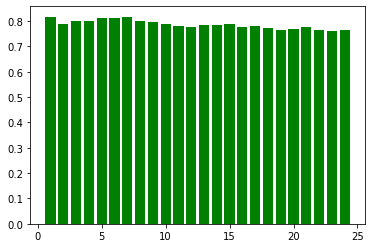

(7, 0.8175499565595135)


In [7]:
#Running KNN Classifier from k=1 through 25 and record testing accuracy
scores ={}
for k in range(1,25):   
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train.values.ravel())
        scores[k]=knn.score(x_test,y_test)
        
#Bar plot to compare accuracy scores with different values of k
plt.bar(list(scores.keys()),scores.values(), color='g')
plt.show()

#K value with the maximum accuracy score.
print((max(scores, key=scores.get),max(scores.values()))) #seems that we obtain the best score with the value k=7
    

#Dictionnary that we be filled with the accuracy scores of models trained with raw data.
unprocessed={}
unprocessed["KNN (k=7)"]=max(scores.values())

#### Logistic regression

In [8]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train,y_train.values.ravel())
pred_lr = lr_model.predict(x_test) #predictions of the model on the test set
score_lr = lr_model.score(x_test, y_test) #score accuracy of the model
print(score_lr)
unprocessed["Logistic regression"]=score_lr

0.9035621198957429


Confusion matrix of the model

In [9]:
cm = metrics.confusion_matrix(y_test, pred_lr)
print(cm)

[[645  46]
 [ 65 395]]


However this model is not very adapted to our dataset since we are facing a classification problem.

#### Linear discrimant Analysis

In [10]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train,y_train.values.ravel())
pred_lda = lda_model.predict(x_test)
score_lda = lda_model.score(x_test, y_test)
print(score_lda)
unprocessed["Linear Discriminant Analysis"]=score_lda

0.8731537793223284


#### Quadratic discriminant Analysis

In [11]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train,y_train.values.ravel())
pred_qda = qda_model.predict(x_test)
score_qda = qda_model.score(x_test, y_test)
print(score_qda)
unprocessed["Quadratic discriminant Analysis"]=score_qda

0.7932232841007819


/Users/syrineb/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Random Forest

In [12]:
rforest_model = RandomForestClassifier()
rforest_model.fit(x_train,y_train.values.ravel())
pred_forest = rforest_model.predict(x_test)
score_forest = rforest_model.score(x_test, y_test)
print(score_forest)
unprocessed["Random Forest"]=score_forest

0.947871416159861


#### Bagging

In [13]:
bagging_model= BaggingClassifier()
bagging_model.fit(x_train,y_train.values.ravel())
pred_bagging = bagging_model.predict(x_test)
score_bagging = bagging_model.score(x_test, y_test)
print(score_bagging)
unprocessed["Bagging"]=score_bagging

0.9339704604691572


#### Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
boosting_model=GradientBoostingClassifier(n_estimators=57, max_features=2, max_depth=2)
boosting_model.fit(x_train,y_train.values.ravel())
pred_boosting = bagging_model.predict(x_test)
score_boosting = boosting_model.score(x_test, y_test)
print(score_boosting)
unprocessed["Boosting"]=score_boosting

0.9157254561251086


# With standardized x and y

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### KNN Classifier

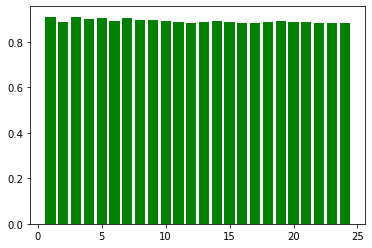

(1, 0.9105125977410947)


In [16]:
#Try running from k=1 through 25 and record testing accuracy
scores ={}
for k in range(1,25):   
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train.values.ravel())
        scores[k]=knn.score(x_test,y_test)
        
#histogram to compare accuracy scores with different values of k
plt.bar(list(scores.keys()),scores.values(), color='g')
plt.show()

print((max(scores, key=scores.get),max(scores.values())))
#seems that we obtain the best score with the value k=1
processed={}
processed["KNN (k=1)"]=max(scores.values())

#### Logistic regression

In [17]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train,y_train.values.ravel())
pred_lr = lr_model.predict(x_test)
score_lr = lr_model.score(x_test, y_test) #score accuracy of the model
print(score_lr)
processed["Logistic regression"]=score_lr

0.9044309296264118


#### Linear discrimant Analysis

In [19]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train,y_train.values.ravel())
pred_lda = lda_model.predict(x_test)
score_lda = lda_model.score(x_test, y_test)
print(score_lda)
processed["Linear Discriminant Analysis"]=score_lda

0.8731537793223284


#### Quadratic discriminant Analysis

In [20]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train,y_train.values.ravel())
pred_qda = qda_model.predict(x_test)
score_qda = qda_model.score(x_test, y_test)
print(score_qda)
processed["Quadratic discriminant Analysis"]=score_qda

0.7914856646394439


/Users/syrineb/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Random Forest

In [21]:
rforest_model = RandomForestClassifier()
rforest_model.fit(x_train,y_train.values.ravel())
pred_forest = rforest_model.predict(x_test)
score_forest = rforest_model.score(x_test, y_test)
print(score_forest)
processed["Random Forest"]=score_forest

0.947002606429192


#### Bagging

In [22]:
bagging_model= BaggingClassifier()
bagging_model.fit(x_train,y_train.values.ravel())
pred_bagging = bagging_model.predict(x_test)
score_bagging = bagging_model.score(x_test, y_test)
print(score_bagging)
processed["Bagging"]=score_bagging

0.945264986967854


#### Boosting

In [23]:
boosting_model=GradientBoostingClassifier(n_estimators=57, max_features=2, max_depth=2)
boosting_model.fit(x_train,y_train.values.ravel())
pred_boosting = bagging_model.predict(x_test)
score_boosting = boosting_model.score(x_test, y_test)
print(score_boosting)
processed["Boosting"]=score_boosting

0.8983492615117289


# Comparing models

In [24]:
index=set(list(unprocessed.keys())+list(processed.keys()))
index=list(index)
results=pd.DataFrame( columns = ['Unprocessed' , 'Processed'], index=index)
for key,value in unprocessed.items():
    results.at[key, "Unprocessed"]=value
for key,value in processed.items():
    results.at[key, "Processed"]=value
results

,Unprocessed,Processed
Random Forest,0.947871,0.947003
Quadratic discriminant Analysis,0.793223,0.791486
KNN (k=1),NaN,0.910513
Boosting,0.915725,0.898349
Bagging,0.93397,0.945265
Logistic regression,0.903562,0.904431
Linear Discriminant Analysis,0.873154,0.873154
KNN (k=7),0.81755,NaN


/Users/syrineb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/syrineb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accuracy scores for each models with UNprocessed data')

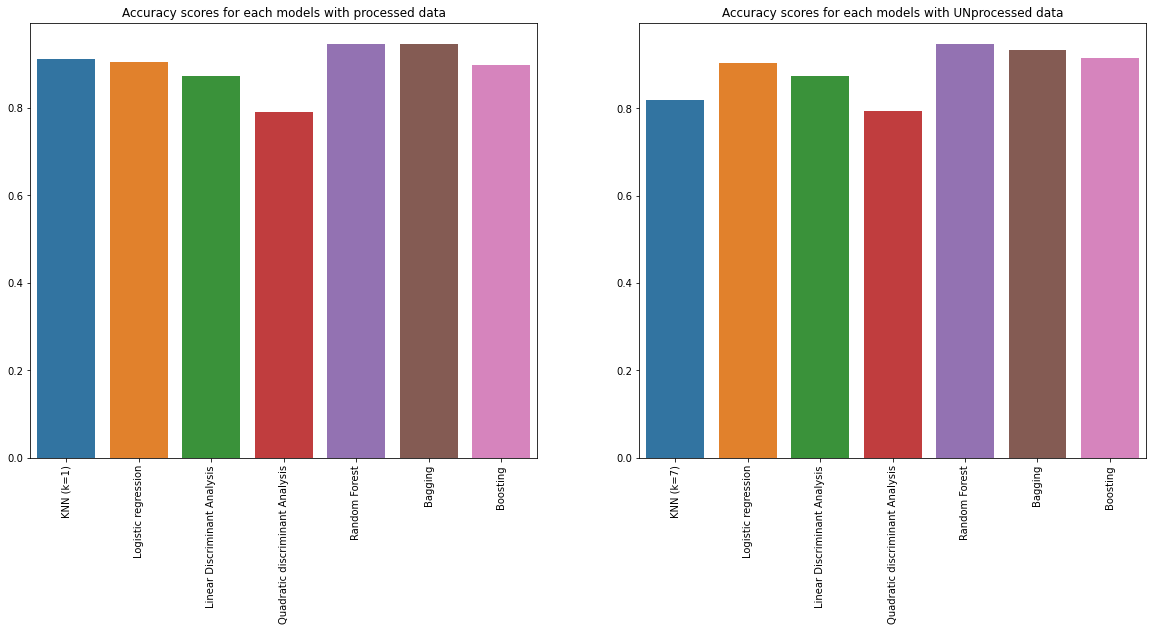

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
plot1=sns.barplot(list(processed.keys()), list(processed.values()),ax=ax1)
plot2=sns.barplot(list(unprocessed.keys()), list(unprocessed.values()),ax=ax2)
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
ax1.set_title('Accuracy scores for each models with processed data')
ax2.set_title('Accuracy scores for each models with UNprocessed data')

#  

We can notice that the model with the highest accuracy score is the Random Forest model. The bagging model also has a great performance with the processed data.

### Grid Search

In [26]:
parameters = { 'gamma' : [0.2, 0.5, 0.8]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_)

/Users/syrineb/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5630685914076758 SVR(gamma=0.2)
